In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
cd drive/MyDrive/Colab\ Notebooks/IM/yolo

/content/drive/MyDrive/Colab Notebooks/IM/yolo


In [3]:
!pip install opencv-python numpy ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 15.3 MB/s eta 0:00:00


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Load the YOLO model (you can specify the model version you want)
model = YOLO('yolov8n.pt')  # You can change to yolov8s.pt, yolov8m.pt, etc. for larger models

100%|██████████| 6.25M/6.25M [00:00<00:00, 49.7MB/s]


In [ ]:
# Define the paths to your dataset
image_folder = 'datasets/dataset/images'  # Path to your images
label_folder = 'datasets/dataset/labels'  # Path to your labels

In [ ]:
def load_images_and_labels(image_folder, label_folder):
    images = []
    labels = []

    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(image_folder, filename)
            label_path = os.path.join(label_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt'))

            # Load image
            img = cv2.imread(img_path)
            images.append(img)

            # Load labels
            with open(label_path, 'r') as file:
                label_data = file.readlines()
                labels.append(label_data)

    return images, labels

In [ ]:
def detect_cracks(images):
    results = []

    for img in images:
        # Perform inference
        result = model(img)
        results.append(result[0])  # Access the first result for the current image

    return results

In [ ]:
def visualize_results(images, results):
    for img, result in zip(images, results):
        # Convert image from BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Plot the results
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)

        # Draw bounding boxes
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].numpy()  # Get bounding box coordinates
            conf = box.conf[0].item()  # Get confidence score
            label = box.cls[0].item()  # Get class label

            # Draw rectangle
            cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            plt.text(int(x1), int(y1), f'{model.names[int(label)]} {conf:.2f}', color='white', fontsize=12, backgroundcolor='blue')

        plt.axis('off')
        plt.show()

In [ ]:
# Load images and labels
images, labels = load_images_and_labels(image_folder, label_folder)

# Detect cracks in images
results = detect_cracks(images)

# Visualize the results
visualize_results(images, results)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_dir = 'datasets/dataset'  # Path to your dataset
images_dir = os.path.join(dataset_dir, 'images')
labels_dir = os.path.join(dataset_dir, 'labels')

# Create directories for train and validation sets
train_images_dir = os.path.join(dataset_dir, 'train/images')
train_labels_dir = os.path.join(dataset_dir, 'train/labels')
val_images_dir = os.path.join(dataset_dir, 'val/images')
val_labels_dir = os.path.join(dataset_dir, 'val/labels')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Get list of image files
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]

# Split the dataset (80% train, 20% validation)
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Move files to their respective directories
for file in train_files:
    shutil.copy(os.path.join(images_dir, file), train_images_dir)
    shutil.copy(os.path.join(labels_dir, file.replace('.jpg', '.txt').replace('.png', '.txt')), train_labels_dir)

for file in val_files:
    shutil.copy(os.path.join(images_dir, file), val_images_dir)
    shutil.copy(os.path.join(labels_dir, file.replace('.jpg', '.txt').replace('.png', '.txt')), val_labels_dir)

print(f"Training images: {len(train_files)}, Validation images: {len(val_files)}")

Training images: 24, Validation images: 6


In [ ]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8n.pt')

# Train the model using the YAML configuration file
results = model.train(data='data.yaml', epochs=10, imgsz=640, batch=16)

Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 755k/755k [00:00<00:00, 10.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/IM/yolo/datasets/dataset/train/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab Notebooks/IM/yolo/datasets/dataset/val/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train11
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.585      3.599      2.237         41        640: 100%|██████████| 2/2 [00:25<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all          6         28    0.00389       0.25    0.00544    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.628      3.628      2.408         31        640: 100%|██████████| 2/2 [00:20<00:00, 10.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]

                   all          6         28    0.00667      0.429    0.00874    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.505      3.455      2.261         34        640: 100%|██████████| 2/2 [00:19<00:00,  9.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all          6         28    0.00889      0.571     0.0281     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.264      3.375      1.953         45        640: 100%|██████████| 2/2 [00:18<00:00,  9.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

                   all          6         28     0.0106      0.679     0.0672     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.033      3.191      1.816         39        640: 100%|██████████| 2/2 [00:18<00:00,  9.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all          6         28     0.0111      0.714     0.0955     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.106      3.051      1.869         37        640: 100%|██████████| 2/2 [00:18<00:00,  9.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all          6         28     0.0128      0.821     0.0924     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.004      2.946       1.76         34        640: 100%|██████████| 2/2 [00:18<00:00,  9.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]

                   all          6         28     0.0106      0.679     0.0686     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.922      2.875      1.824         20        640: 100%|██████████| 2/2 [00:17<00:00,  8.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all          6         28     0.0122      0.786     0.0721     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.801      2.615      1.659         25        640: 100%|██████████| 2/2 [00:18<00:00,  9.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all          6         28     0.0117       0.75     0.0729      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.774      2.596      1.555         34        640: 100%|██████████| 2/2 [00:19<00:00,  9.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all          6         28     0.0111      0.714     0.0702     0.0282



10 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


                   all          6         28     0.0111      0.714     0.0953     0.0372
Speed: 2.3ms preprocess, 201.3ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/train11


In [ ]:
# Evaluate the model
metrics = model.val()
print(metrics)

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/Colab Notebooks/IM/yolo/datasets/dataset/val/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


                   all          6         28      0.408      0.286      0.209     0.0883
Speed: 2.4ms preprocess, 223.8ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc510a8a230>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0330

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score



0: 448x640 7 cracks, 332.4ms
Speed: 20.1ms preprocess, 332.4ms inference, 30.8ms postprocess per image at shape (1, 3, 448, 640)


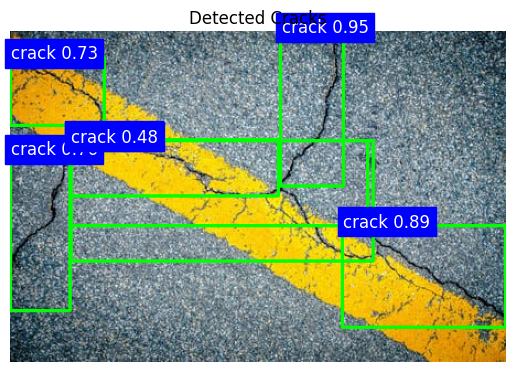

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('best.pt')  # Load the best model from training

# Function to perform inference
def detect_cracks_on_unseen_images(image_paths):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        results = model(img)

        # Visualize results
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        for box in results[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].numpy()
            conf = box.conf[0].item()
            label = box.cls[0].item()

            # Draw bounding box on the image
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green color and thickness of 2

            # Add label and confidence score
            plt.text(x1, y1, f'{model.names[int(label)]} {conf:.2f}', color='white', fontsize=12, backgroundcolor='blue')

        # Convert BGR image to RGB for visualization
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axis
        plt.title('Detected Cracks')
        plt.show()  # Display the image with detections

# Example usage
image_paths = [
    'road.jpeg',
]

detect_cracks_on_unseen_images(image_paths)


0: 480x640 2 cracks, 342.4ms
Speed: 13.7ms preprocess, 342.4ms inference, 32.9ms postprocess per image at shape (1, 3, 480, 640)


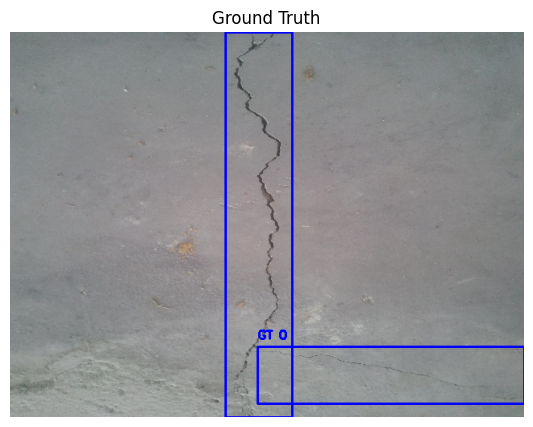

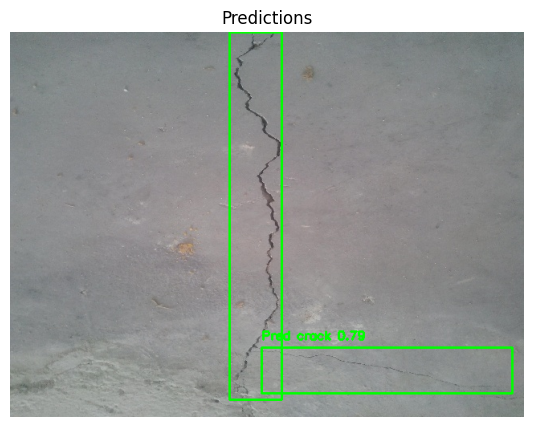

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('best.pt')  # Load the best model from training

# Function to load YOLO annotation (ground truth)
def load_ground_truth(annotation_file, img_shape):
    """
    Load YOLO annotations from the text file and convert them into bounding boxes.
    YOLO format: class_id x_center y_center width height (normalized)
    """
    ground_truth_boxes = []
    with open(annotation_file, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.split())
            img_h, img_w = img_shape[:2]

            # Convert YOLO normalized format to (x1, y1, x2, y2)
            x1 = int((x_center - width / 2) * img_w)
            y1 = int((y_center - height / 2) * img_h)
            x2 = int((x_center + width / 2) * img_w)
            y2 = int((y_center + height / 2) * img_h)
            ground_truth_boxes.append((class_id, x1, y1, x2, y2))

    return ground_truth_boxes

# Function to perform inference and show ground truth vs predicted results separately
def detect_cracks_on_unseen_images(image_paths, annotation_paths):
    for img_path, ann_path in zip(image_paths, annotation_paths):
        # Load the image
        img = cv2.imread(img_path)
        img_gt = img.copy()  # Copy for ground truth visualization
        img_pred = img.copy()  # Copy for prediction visualization

        # Load ground truth annotations
        ground_truth_boxes = load_ground_truth(ann_path, img.shape)

        # Visualize ground truth boxes in red
        for class_id, x1, y1, x2, y2 in ground_truth_boxes:
            cv2.rectangle(img_gt, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red for ground truth
            cv2.putText(img_gt, f'GT {int(class_id)}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Perform detection with the model
        results = model(img)

        # Visualize predicted boxes in green
        for box in results[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].numpy()
            conf = box.conf[0].item()
            label = box.cls[0].item()

            # Draw bounding box for the prediction
            cv2.rectangle(img_pred, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green for prediction

            # Add label and confidence score
            cv2.putText(img_pred, f'Pred {model.names[int(label)]} {conf:.2f}',
                        (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display Ground Truth image
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(img_gt, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axis
        plt.title('Ground Truth')
        plt.show()  # Show Ground Truth image

        # Display Prediction image
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axis
        plt.title('Predictions')
        plt.show()  # Show Predicted image

# Example usage
image_paths = ['001.jpg']
annotation_paths = ['001.txt']  # Corresponding YOLO annotation file

detect_cracks_on_unseen_images(image_paths, annotation_paths)
